## Alignment of batch 8 outliers to ACod, eastern PCod

<br>

I want to align outlier loci (detected using Bayescan) to the Atlantic cod genome, and to the outliers that Dan / Kristen found in the eastern PCod populations. 

<br>
Programs used: 

1. BOWTIE 2 
2. `samtools`
3. `bedtools`



<br>
#### Installing bowtie 2:
This makes bowtie2 commands callable from anywhere. 

In [ ]:
# from root directory
sudo apt-get install bowtie2

#### Installing samtools

In [ ]:
#first had to install a bunch of other shit from root directory
sudo apt-get install libncurses5-dev libncursesw5-dev
sudo apt-get install libcurl4-openssl-dev
sudo apt-get install libssl-dev

In [ ]:
cd Downloads
tar xvjf samtools-1.6.tar.bz2
cd samtools-1.6
./configure
make
sudo make install

**Installing bedtools**

In [ ]:
$ wget https://github.com/arq5x/bedtools2/releases/download/v2.26.0/bedtools-2.26.0.tar.gz
$ tar -zxvf bedtools-2.26.0.tar.gz
$ cd bedtools2
$ make
$ sudo make install #this didn't really work for me; I have to work in the bedtools folder to call the scripts

<br>
### Create reference database of (new) Atlantic cod genome

The database I made previously is based on an older version of the genome. 
The [new genome](https://osf.io/4qsdw/) "gadMor2.fasta" was published by [Torresen et al. 2017 in BMC Genomics](https://bmcgenomics.biomedcentral.com/articles/10.1186/s12864-016-3448-x) (open access).

In [1]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/notebooks'

In [2]:
cd ../../PCod-Compare-repo/ACod_reference

/mnt/hgfs/PCod-Compare-repo/ACod_reference


In [5]:
!bowtie2-build gadMor2.fasta Gadus_morhua2

Settings:
  Output files: "Gadus_morhua2.*.bt2"
  Line rate: 6 (line is 64 bytes)
  Lines per side: 1 (side is 64 bytes)
  Offset rate: 4 (one in 16)
  FTable chars: 10
  Strings: unpacked
  Max bucket size: default
  Max bucket size, sqrt multiplier: default
  Max bucket size, len divisor: 4
  Difference-cover sample period: 1024
  Endianness: little
  Actual local endianness: little
  Sanity checking: disabled
  Assertions: disabled
  Random seed: 0
  Sizeofs: void*:8, int:4, long:8, size_t:8
Input files DNA, FASTA:
  gadMor2.fasta
Building a SMALL index
Reading reference sizes
  Time reading reference sizes: 00:00:17
Calculating joined length
Writing header
Reserving space for joined string
Joining reference sequences
  Time to join reference sequences: 00:00:03
bmax according to bmaxDivN setting: 158187076
Using parameters --bmax 118640307 --dcv 1024
  Doing ahead-of-time memory usage test
  Passed!  Constructing with these parameters: --bmax 118640307 --dcv 1024
Constructing suffi

  10%
  20%
  30%
  40%
  50%
  60%
  70%
  80%
  90%
  100%
  Block accumulator loop time: 00:00:05
  Sorting block of length 83214070
  (Using difference cover)
  Sorting block time: 00:00:58
Returning block of 83214071
Getting block 2 of 7
  Reserving size (118640307) for bucket
  Calculating Z arrays
  Calculating Z arrays time: 00:00:00
  Entering block accumulator loop:
  10%
  20%
  30%
  40%
  50%
  60%
  70%
  80%
  90%
  100%
  Block accumulator loop time: 00:00:06
  Sorting block of length 113693523
  (Using difference cover)
  Sorting block time: 00:01:28
Returning block of 113693524
Getting block 3 of 7
  Reserving size (118640307) for bucket
  Calculating Z arrays
  Calculating Z arrays time: 00:00:00
  Entering block accumulator loop:
  10%
  20%
  30%
  40%
  50%
  60%
  70%
  80%
  90%
  100%
  Block accumulator loop time: 00:00:06
  Sorting block of length 116821463
  (Using difference cover)
  Sorting block time: 00:01:29
Returning block of 116821464
Getting block 4 

<br>

### Create fasta file of outlier loci consensus sequences

I can do this by going into the `batch_8.catalog.tags.tsv` file and extracting the consensus sequence associated with each outlier locus ID. 

In [6]:
cd ../../PCod-Korea-repo/

/mnt/hgfs/PCod-Korea-repo


In [7]:
# read in outlier loci IDs
infile = open("analyses/Outliers/batch_8_BAYESCAN_outliers_stacksIDs.txt", "r")

outlier_list = []
for line in infile:
    outlier_list.append(line.strip())
infile.close()

In [9]:
# write out the locus IDs and the consensus sequences to a new fasta file
outfile = open("analyses/Outliers/batch_8_BAYESCAN_outliers_sequences.fa", "w")
seqfile = open("stacks_b8_wgenome/batch_7.catalog.tags.tsv", "r")
seqs_added = 0
seqfile.readline()
for line in seqfile:
    linelist = line.strip().split("\t")
    if linelist[2] in outlier_list:
        outfile.write(">" + linelist[2] + "\n" + linelist[9] + "\n")
        seqs_added += 1
seqfile.close()
outfile.close()
print "Succesfully added sequences for ", seqs_added, " outlier loci."

Succesfully added sequences for  93  outlier loci.


In [10]:
!head analyses/Outliers/batch_8_BAYESCAN_outliers_sequences.fa

>59
TGCAGGACCGGTGAGGTGTGGAATACAGCCCAACACAACACCAGGAGCCAAACACCAAGCAGAGGCATGGACCTGCTACTCTGAGAGCAGAGTAAAGACCCACATCATGGCTCAGTGCTATGGGTGCTCTTTGTTTTTTTGT
>74
TGCAGGAGCAGGAGAGGATCATCACCATGTCGTATGCACTGGCTTCCGAGGCGTCGCTTAAGAGCAAACAGGTCACAGGTACGTCCGCTCGTCTGTTCAACCATCTGCTCCAGCTCACTTCTCAAAGACTCCTTCTCTTTAG
>453
TGCAGGTGCACCTCCGACCCCTTCTCATAGGCCTCCCAGGCGAACACTGGAACACAGCGCACGGCCGGGCCGTTAACCAGGGGCACCACGCACACACTGCAGGGCTGGGGTTAACTAGCTACTACTGGTTAGAGACTTAGGT
>971
TGCAGGTCAGAGACTTCAAACTGAGGCAGAAGAGCTTCAAAGCCGTCACCCTGCTGGTAGAAGGCGGACACCTCAGAGTCAACTTCATTGCTCGGTGAATAGGCTCGTCTGGTCCAGTCAGAGAGTTCTTGAGAGGTCCCTG
>1185
TGCAGGACCTCAAAAACAGGTTTGCCTGAAAAAGCAAACGAAGTGAAACTGCAATGTGTCTTTCCATATGCCAGCGGATGTCCTTCTGTGTCACAGAAAAGGATCTCAGTATTACCCCGAACTATACACAATAAATCGTTCA


<br>
<br>
### Align fasta to Atlantic cod genome reference

In [26]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/analyses/Outliers'

In [27]:
cd ../../

/mnt/hgfs/PCod-Korea-repo


In [28]:
!bowtie2 -f \
-x ../PCod-Compare-repo/ACod_reference/Gadus_morhua2 \
-U analyses/Outliers/batch_8_BAYESCAN_outliers_sequences.fa \
-S analyses/Outliers/batch_8_BAYESCAN_outliers_bowtie2_Acod.sam

93 reads; of these:
  93 (100.00%) were unpaired; of these:
    9 (9.68%) aligned 0 times
    68 (73.12%) aligned exactly 1 time
    16 (17.20%) aligned >1 times
90.32% overall alignment rate



<br>
### Annotation

<br>
These notes were taken from Charlie Waters. 

**STEP ONE: convert SAM to BAM to sortedBAM to BED**

<br>
<br>
### Redo Steps:  FILTER BOWTIE2 MATCHES BY MAPPING QUALITY

<br>
#### Step 1: filter by mapping quality (must be > 10)

In [40]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/analyses/Outliers'

In [41]:
infile = open("batch_8_BAYESCAN_outliers_bowtie2_Acod.sam", "r")
outfile = open("batch_8_BAYESCAN_outliers_bowtie2_Acod_filteredMQ.sam", "w")
line = infile.readline()
while line.startswith("@SQ") or line.startswith("@HD"):
    outfile.write(line)
    line = infile.readline()
outfile.write(line)

mapquals = []
loci_aligned = []
for line in infile:
    linelist=line.strip().split()
    locus = linelist[0]
    if locus in loci_aligned:
        print locus, " aligned to two positions"
    else:
        loci_aligned.append(locus)
    mapq = linelist[4]
    mapquals.append(float(mapq))
    if float(mapq) > 10: #this would be a probability of correct mapping = 0.99
        outfile.write(line)
infile.close()
outfile.close()

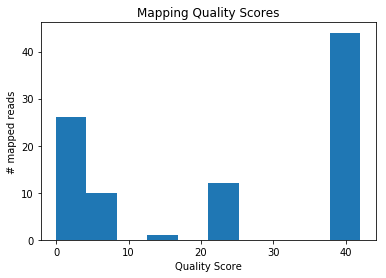

In [42]:
import numpy as np
import matplotlib.pyplot as plt
plt.hist(mapquals)
plt.title("Mapping Quality Scores")
plt.xlabel("Quality Score")
plt.ylabel("# mapped reads")
plt.show()

In [43]:
plt.close()

<br>
#### Step 2: SAM --> BAM --> BED

In [44]:
!samtools view -bS batch_8_BAYESCAN_outliers_bowtie2_Acod_filteredMQ.sam > batch_8_BAYESCAN_outliers_bowtie2_Acod_filteredMQ.bam

In [45]:
!samtools sort batch_8_BAYESCAN_outliers_bowtie2_Acod_filteredMQ.bam -o batch_8_BAYESCAN_outliers_bowtie2_Acod_sorted_filteredMQ.bam

In [52]:
cd bedtools2/bin/

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin


In [55]:
!./bamToBed -i /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/batch_8_BAYESCAN_outliers_bowtie2_Acod_sorted_filteredMQ.bam \
>> /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/batch_8_BAYESCAN_outliers_bowtie2_Acod_MQfiltered.bed


<br>
#### Step 3: Sort the BED file

In [57]:
!./sortBed -i ../../batch_8_BAYESCAN_outliers_bowtie2_Acod_MQfiltered.bed > ../../batch_8_BAYESCAN_outliers_bowtie2_Acod_MQfiltered_sorted.bed

<br>
#### Step 4: Download and sort annotation file

First, I downloaded the file [gadMor2_annotation_complete.gff](https://osf.io/g9w7s/).

The file is too big to manually sort, so I'll grab only the rows that have "gene" in them. 

Then I opened the file in excel and sorted first by chromosome (scaffold), and then by start position. New file: 
`gadMor2_annotation_complete_genes_manualsort.gff`

In [ ]:
!grep 'gene' /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete.gff > \
/mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_genes.gff

<br>
#### Step 5: run closestBed

This must be done from within the `bedtools2/bin` folder. 


`closest -a file.bed -b .gff -g table.tab -D b > outfile.bed`


Argument `-D a`: reports the closest featured in `-b` (ACod) WITH its distance from `-a` as an extra column. Will use negative distances to report upstream features. Reports in respect to `-a`, so "upstream" means that the ACod gene has a higher (start,stop) than the PCod sequence. 

Argument `-k`: report the "k" closest hits. Default is 1

In [59]:
!./closestBed -a ../../batch_8_BAYESCAN_outliers_bowtie2_Acod_MQfiltered_sorted.bed \
-b /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_genes_manualsort.gff \
-D a \
-k 2 \
-header \
> ../../batch_8_BAYESCAN_outliers_bowtie2_Acod_MQfiltered_Annotations.bed

#### For formatted version, see Results/batch_8_southeast_BAYESCAN_outliers_annotated.xlsx
<br>
<br>
<br>


#### Step 6: Extract gene sequences from annotations.bed file to BLAST 

So when I looked at my annotations.bed file, I noticed that some of the gene IDs are difficult to interpret. For example, this gene ID clearly states a gene function: 

`ID=GAMO_00032736;Name=GAMO_00032736;Alias=augustus_masked-LG08-processed-gene-181.8;Note=Similar to sirt5: NAD-dependent protein deacylase sirtuin-5%2C mitochondrial (Xenopus tropicalis);Dbxref=Gene3D:G3DSA:3.30.1600.10,Gene3D:G3DSA:3.40.50.1220,Hamap:MF_01121,InterPro:IPR003000,InterPro:IPR026590,InterPro:IPR026591,InterPro:IPR027546,InterPro:IPR029035,PANTHER:PTHR11085,PANTHER:PTHR11085:SF13,Pfam:PF02146,ProSiteProfiles:PS50305,SUPERFAMILY:SSF52467;Ontology_term=GO:0036054,GO:0036055,GO:0070403;`


However, this one does not: 

`ID=LG08:hit:131211:4.5.0.181;Name=augustus_masked-LG08-abinit-gene-181.8-mRNA-1;_AED=0.41;_eAED=0.41;_QI=0|0.83|0.71|0.85|1|1|7|0|278`
<br>
<br>

So for each of the outliers that is near a gene that is not obviously identified, I'm going to use `samtools` to extract the full sequence of that gene from the genome fasta file, and then BLAST it online. 

This might be a huge pain, so I'm going to prioritize outliers that also came up in the south v. east comparison. 

The code to do so is: 

`!samtools faidx genome.fa geneA:x-y # returns sequence from positions x through y from geneA`


<br>
<br>
<br>
<br>
<br>

<br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br><br>
<br>
<br>
<br>
<br>

<br>


<br>

### Steps that had to be redone

Lessons learned from the mess below: 

1. DON'T USE BEDTOOLS V2.25 to run the closestBED command. 
2. Manually sort the .gff file in excel, first by scaffold and then by start position.


In [29]:
cd analyses/Outliers

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers


In [30]:
!samtools view -bS batch_8_BAYESCAN_outliers_bowtie2_Acod.sam > batch_8_BAYESCAN_outliers_bowtie2_Acod.bam

In [31]:
!samtools sort batch_8_BAYESCAN_outliers_bowtie2_Acod.bam -o batch_8_BAYESCAN_outliers_bowtie2_Acod_sorted.bam

In [32]:
!bedtools bamToBed -i batch_8_BAYESCAN_outliers_bowtie2_Acod_sorted.bam >> batch_8_BAYESCAN_outliers_bowtie2_Acod.bed

/bin/sh: 1: bedtools: not found


In [33]:
cd bedtools2/

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2


In [35]:
cd bin/

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin


In [37]:
!./bamToBed -i /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/batch_8_BAYESCAN_outliers_bowtie2_Acod_sorted.bam \
>> /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/batch_8_BAYESCAN_outliers_bowtie2_Acod.bed

In [38]:
!head /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/batch_8_BAYESCAN_outliers_bowtie2_Acod.bed

LG13	23171790	23171932	59	24	+
LG14	16964597	16964739	74	42	-
LG10	23241107	23241249	453	40	+
LG18	10188214	10188356	971	6	-
LG09	2184192	2184321	1185	0	+
LG12	16093295	16093437	1904	7	+
LG01	23068418	23068560	2049	42	-
LG01	7446400	7446543	2098	24	+
LG20	14555093	14555235	2360	40	+
LG16	1699960	1700102	2606	0	+


In [39]:
cd /mnt/hgfs/PCod-Korea-repo/analyses/Outliers

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers


<br>
**STEP TWO: Get two remaining input files: `.gff` annotation file, text file with lengths of scaffolds**

First, I downloaded the file [gadMor2_annotation_complete.gff](https://osf.io/g9w7s/).

I think that I can get lengths of scaffolds based on [this thread](https://www.biostars.org/p/173963/):

In [37]:
!pip install pyfaidx

  Running setup.py bdist_wheel for pyfaidx ... done
  Stored in directory: /home/mfisher5/.cache/pip/wheels/47/ce/b5/841260d96da0a930ccbdeac0009f1b25a808411d9ed6d26479
Successfully built pyfaidx


In [38]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/analyses/Outliers'

In [39]:
cd ../../

/mnt/hgfs/PCod-Korea-repo


In [41]:
!faidx ../PCod-Compare-repo/ACod_reference/gadMor2.fasta -i chromsizes > analyses/Outliers/Gadus_morhua2_chromsizes.genome

Or I can do this through samtools

In [42]:
!samtools faidx ../PCod-Compare-repo/ACod_reference/gadMor2.fasta 

In [43]:
!cut -f1,2 ../PCod-Compare-repo/ACod_reference/gadMor2.fasta.fai > sizes.genome


<br>
<br>
**STEP THREE: run bedtools' `closest` command**

I had to do this from within the bedtools folder.

`closest -a file.bed -b .gff -g table.tab -D b > outfile.bed`

In [44]:
pwd

u'/mnt/hgfs/PCod-Korea-repo'

In [46]:
cd /home/mfisher5/Downloads/bedtools2/bin/

/home/mfisher5/Downloads/bedtools2/bin


In [52]:
!./closestBed -a /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/batch_8_BAYESCAN_outliers_bowtie2_Acod.bed \
-b /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete.gff \
-g /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/Gadus_morhua2_chromsizes.txt \
-D "b" > batch_8_BAYESCAN_outliers_bowtie2_Acod_Annotations.bed

Segmentation fault (core dumped)


*So the version that I WAS working with (2.25) had only `closestBed`, not `closest`. *

*I had to reinstall bedtools version 2.26 and then go from there. I put this new version of bedtools into my file folder since I have to work out of there anyway.*

In [1]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/notebooks'

In [2]:
cd ../analyses/Outliers/

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers


In [3]:
cd bedtools2/

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2


In [4]:
cd bin

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin


In [10]:
!closestBed -a ../../batch_8_BAYESCAN_outliers_bowtie2_Acod.bed \
-b /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete.gff \
-d \
> ../batch_8_BAYESCAN_outliers_bowtie2_Acod_Annotations.bed

Error: Sorted input specified, but the file /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete.gff has the following out of order record
GmG20150304_scaffold_9277	maker	CDS	1843	1883	.	+	0	ID=GAMO_00081734-RA:cds;Parent=GAMO_00081734-RA;


I guess I have to sort my `.gff` file. I can do this with BedTools

BedTools `sort` command sorts a file by chromosome and then by start position, in ascending order (default). This is the sort order needed for `closestBed`.

In [12]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin'

In [13]:
!sort -i /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete.gff > /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_sorted.gff

In [14]:
!closestBed -a ../../batch_8_BAYESCAN_outliers_bowtie2_Acod.bed \
-b /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_sorted.gff \
-d \
> ../batch_8_BAYESCAN_outliers_bowtie2_Acod_Annotations.bed

Error: Sorted input specified, but the file /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_sorted.gff has the following out of order record
GmG20150304_scaffold_1416	augustus_masked	match	174	1031	0.75	+	.	ID=GmG20150304_scaffold_1416:hit:7786:4.5.0.0;Name=augustus_masked-GmG20150304_scaffold_1416-abinit-gene-0.0-mRNA-1;_AED=1.00;_eAED=1.00;_QI=0|0|0|0|1|1|2|0|87


In [17]:
!head /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_sorted.gff

###
###
###
###
###
###
###
###
###
###


#### 10/26/2017

#### TROUBLESHOOTING

**EDIT THE GFF FILE** to only include the lines that have "gene" in them. this may decrease the file size enough for me to sort it manually in excel.

In [16]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin'

In [17]:
cd /mnt/hgfs/PCod-Compare-repo/ACod_reference

/mnt/hgfs/PCod-Compare-repo/ACod_reference


In [35]:
!grep 'gene' gadMor2_annotation_complete.gff > gadMor2_annotation_complete_genes.gff

In [36]:
!head gadMor2_annotation_complete_genes.gff

GmG20150304_scaffold_9277	maker	gene	1843	2599	.	+	.	ID=GAMO_00081734;Name=GAMO_00081734;Alias=augustus_masked-GmG20150304_scaffold_9277-processed-gene-0.0;Note=Protein of unknown function;
GmG20150304_scaffold_9277	maker	mRNA	1843	2599	.	+	.	ID=GAMO_00081734-RA;Parent=GAMO_00081734;Name=GAMO_00081734-RA;Alias=augustus_masked-GmG20150304_scaffold_9277-processed-gene-0.0-mRNA-1;_AED=1.00;_QI=0|0|0|0|1|1|3|0|107;_eAED=1.00;Note=Protein of unknown function;
GmG20150304_scaffold_9277	maker	gene	1821	2580	.	-	.	ID=GAMO_00081733;Name=GAMO_00081733;Alias=snap_masked-GmG20150304_scaffold_9277-processed-gene-0.2;Note=Similar to CASP13: Caspase-13 (Bos taurus);Dbxref=Gene3D:G3DSA:3.40.50.1460,InterPro:IPR002138,InterPro:IPR011600,InterPro:IPR029030,PANTHER:PTHR10454,PANTHER:PTHR10454:SF13,Pfam:PF00656,ProSiteProfiles:PS50207,SUPERFAMILY:SSF52129;Ontology_term=GO:0004197,GO:0006508;
GmG20150304_scaffold_9277	maker	mRNA	1821	2580	.	-	.	ID=GAMO_00081733-RA;Parent=GAMO_00081733;Name=GAMO_00081733-RA

In [37]:
cd /mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin


In [38]:
!sortBed -i /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_genes.gff > /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_genes_sorted.gff

In [14]:
!sortBed -i ../../batch_8_BAYESCAN_outliers_bowtie2_Acod.bed > ../../batch_8_BAYESCAN_outliers_bowtie2_Acod_sorted.bed

In [39]:
!closestBed -a ../../batch_8_BAYESCAN_outliers_bowtie2_Acod.bed \
-b /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_genes_manualsort.gff \
> ../batch_8_BAYESCAN_outliers_bowtie2_Acod_Annotations.bed

Segmentation fault (core dumped)


In [41]:
!closestBed -a ../../batch_8_BAYESCAN_outliers_bowtie2_Acod.bed \
-b /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_genes_manualsort.gff \
-D a \
-k 5 \
> ../batch_8_BAYESCAN_outliers_bowtie2_Acod_Annotations.bed

Segmentation fault (core dumped)


In [42]:
!bedtools --version

bedtools v2.25.0


#### 11/2/2017

I uninstalled `bedtools` from my `usr/local/bin` and then redownloaded version 2.26.0...

In [1]:
pwd

u'/mnt/hgfs/PCod-Korea-repo/notebooks'

In [2]:
cd ../analyses/Outliers/bedtools2/

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2


In [3]:
cd bin

/mnt/hgfs/PCod-Korea-repo/analyses/Outliers/bedtools2/bin


In [10]:
!./closestBed -a ../../batch_8_BAYESCAN_outliers_bowtie2_Acod_sorted.bed \
-b /mnt/hgfs/PCod-Compare-repo/ACod_reference/gadMor2_annotation_complete_genes_manualsort.gff \
-D a \
> ../../batch_8_BAYESCAN_outliers_bowtie2_Acod_Annotations.bed